Reconocimiento de números utilizando Perceptrones

Importaciones

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Función de Activación

In [2]:
# Función de activación escalón
def activation(x):
    return np.where(x >= 0, 1, 0)

Entradas y Salidas

In [3]:
# Representaciones en matriz 5x3 para los números del 0 al 9
inputs = np.array([
    [1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1],  # 0
    [0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],  # 1
    [1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1],  # 2
    [1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1],  # 3
    [1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1],  # 4
    [1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1],  # 5
    [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1],  # 6
    [1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1],  # 7
    [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],  # 8
    [1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1]   # 9
])

# Salidas binarias para los números del 0 al 9
outputs = np.array([
    [0, 0, 0, 0],  # 0
    [0, 0, 0, 1],  # 1
    [0, 0, 1, 0],  # 2
    [0, 0, 1, 1],  # 3
    [0, 1, 0, 0],  # 4
    [0, 1, 0, 1],  # 5
    [0, 1, 1, 0],  # 6
    [0, 1, 1, 1],  # 7
    [1, 0, 0, 0],  # 8
    [1, 0, 0, 1]   # 9
])

Entrenamiento

In [43]:
# Inicialización de pesos
np.random.seed(42)
weights = np.random.rand(15, 4) - 0.5
bias = np.random.rand(4) - 0.5

# Tasa de aprendizaje
learning_rate = 0.1

# Entrenamiento
epochs = 1000
errors = []

for epoch in range(epochs):
    total_error = 0
    for i in range(len(inputs)):
        input_vector = inputs[i]
        target_output = outputs[i]

        # Calcular la salida de la red
        linear_output = np.dot(input_vector, weights) + bias
        predicted_output = activation(linear_output)

        # Calcular el error
        error = target_output - predicted_output
        total_error += np.sum(error**2)

        # Actualizar los pesos y bias
        weights += learning_rate * np.outer(input_vector, error)
        bias += learning_rate * error
    
    errors.append(total_error)

    # Opción para imprimir el error en cada epoch
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Error: {total_error}')

Epoch 0, Error: 14
Epoch 100, Error: 0
Epoch 200, Error: 0
Epoch 300, Error: 0
Epoch 400, Error: 0
Epoch 500, Error: 0
Epoch 600, Error: 0
Epoch 700, Error: 0
Epoch 800, Error: 0
Epoch 900, Error: 0


Grafica del Error

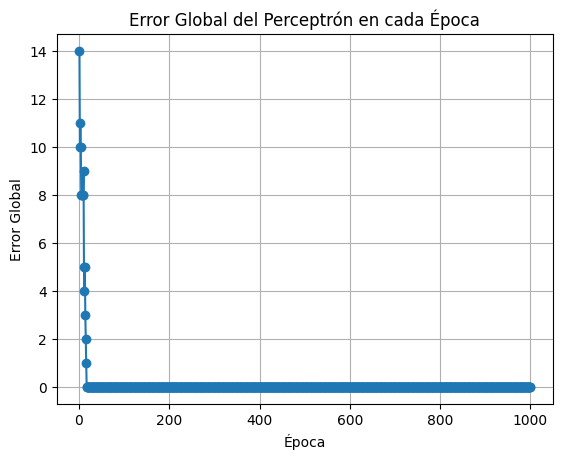

In [44]:
# Grafica del error
plt.figure(1)
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.xlabel('Época')
plt.ylabel('Error Global')
plt.title('Error Global del Perceptrón en cada Época')
plt.grid(True)

Predicciones

In [45]:
# Verificación de las predicciones
for i in range(len(inputs)):
    input_vector = inputs[i]
    target_output = outputs[i]
    linear_output = np.dot(input_vector, weights) + bias
    predicted_output = activation(linear_output)
    print(f'Número esperado: {i}, Predicción: {predicted_output}, Salida esperada: {target_output}')

Número esperado: 0, Predicción: [0 0 0 0], Salida esperada: [0 0 0 0]
Número esperado: 1, Predicción: [0 0 0 1], Salida esperada: [0 0 0 1]
Número esperado: 2, Predicción: [0 0 1 0], Salida esperada: [0 0 1 0]
Número esperado: 3, Predicción: [0 0 1 1], Salida esperada: [0 0 1 1]
Número esperado: 4, Predicción: [0 1 0 0], Salida esperada: [0 1 0 0]
Número esperado: 5, Predicción: [0 1 0 1], Salida esperada: [0 1 0 1]
Número esperado: 6, Predicción: [0 1 1 0], Salida esperada: [0 1 1 0]
Número esperado: 7, Predicción: [0 1 1 1], Salida esperada: [0 1 1 1]
Número esperado: 8, Predicción: [1 0 0 0], Salida esperada: [1 0 0 0]
Número esperado: 9, Predicción: [1 0 0 1], Salida esperada: [1 0 0 1]


Comparación Predicciones

Número esperado: 0, Predicción: 0
Número esperado: 1, Predicción: 1
Número esperado: 2, Predicción: 2
Número esperado: 3, Predicción: 3
Número esperado: 4, Predicción: 4
Número esperado: 5, Predicción: 5
Número esperado: 6, Predicción: 6
Número esperado: 7, Predicción: 7
Número esperado: 8, Predicción: 8
Número esperado: 9, Predicción: 9


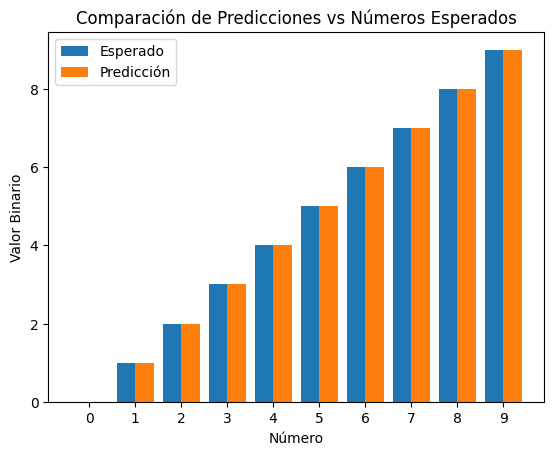

In [46]:
# Predicciones vs. salidas esperadas
expected_numbers = []
predicted_numbers = []

for i in range(len(inputs)):
    input_vector = inputs[i]
    target_output = outputs[i]
    linear_output = np.dot(input_vector, weights) + bias
    predicted_output = activation(linear_output)

    # Convertir los resultados binarios a números decimales
    expected_number = int(''.join(map(str, target_output)), 2)
    predicted_number = int(''.join(map(str, predicted_output)), 2)

    # Almacenar resultados para graficar
    expected_numbers.append(expected_number)
    predicted_numbers.append(predicted_number)

    print(f'Número esperado: {expected_number}, Predicción: {predicted_number}')

# Graficar las predicciones vs los números esperados
x = np.arange(len(inputs))  # Eje x (números de 0 a 9)

plt.bar(x - 0.2, expected_numbers, 0.4, label='Esperado')
plt.bar(x + 0.2, predicted_numbers, 0.4, label='Predicción')

plt.xlabel('Número')
plt.ylabel('Valor Binario')
plt.title('Comparación de Predicciones vs Números Esperados')
plt.xticks(x, [str(i) for i in range(len(inputs))])  # Etiquetas de los números (0 a 9)
plt.legend()

plt.show()

Prueba con Ruido

In [57]:
# Prueba con ruido
noisy_input = np.array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1])  # Entrada con ruido para el número 3
noisy_output = activation(np.dot(noisy_input, weights) + bias)
print(f'Predicción para entrada con ruido: {noisy_output}')

Predicción para entrada con ruido: [0 0 0 1]


Grafica Ruido

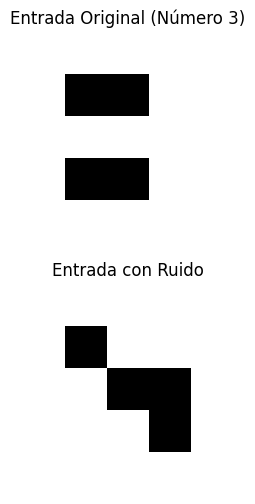

Predicción para entrada con ruido: [0 0 0 1]


In [58]:
# Datos originales (número 8 sin ruido)
original_input = inputs[3]
original_output = outputs[3]

# Graficar los datos originales vs entrada con ruido
fig, ax = plt.subplots(2, 1, figsize=(10, 6))

# Graficar la entrada original
ax[0].imshow(original_input.reshape(5, 3), cmap='gray', interpolation='none')
ax[0].set_title('Entrada Original (Número 3)')
ax[0].axis('off')

# Graficar la entrada con ruido
ax[1].imshow(noisy_input.reshape(5, 3), cmap='gray', interpolation='none')
ax[1].set_title('Entrada con Ruido')
ax[1].axis('off')

plt.show()

# Mostrar la predicción para la entrada con ruido
print(f'Predicción para entrada con ruido: {noisy_output}')